In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('winequality_red.csv')

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
X=data.drop(['quality'],axis=1)
y=data['quality']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

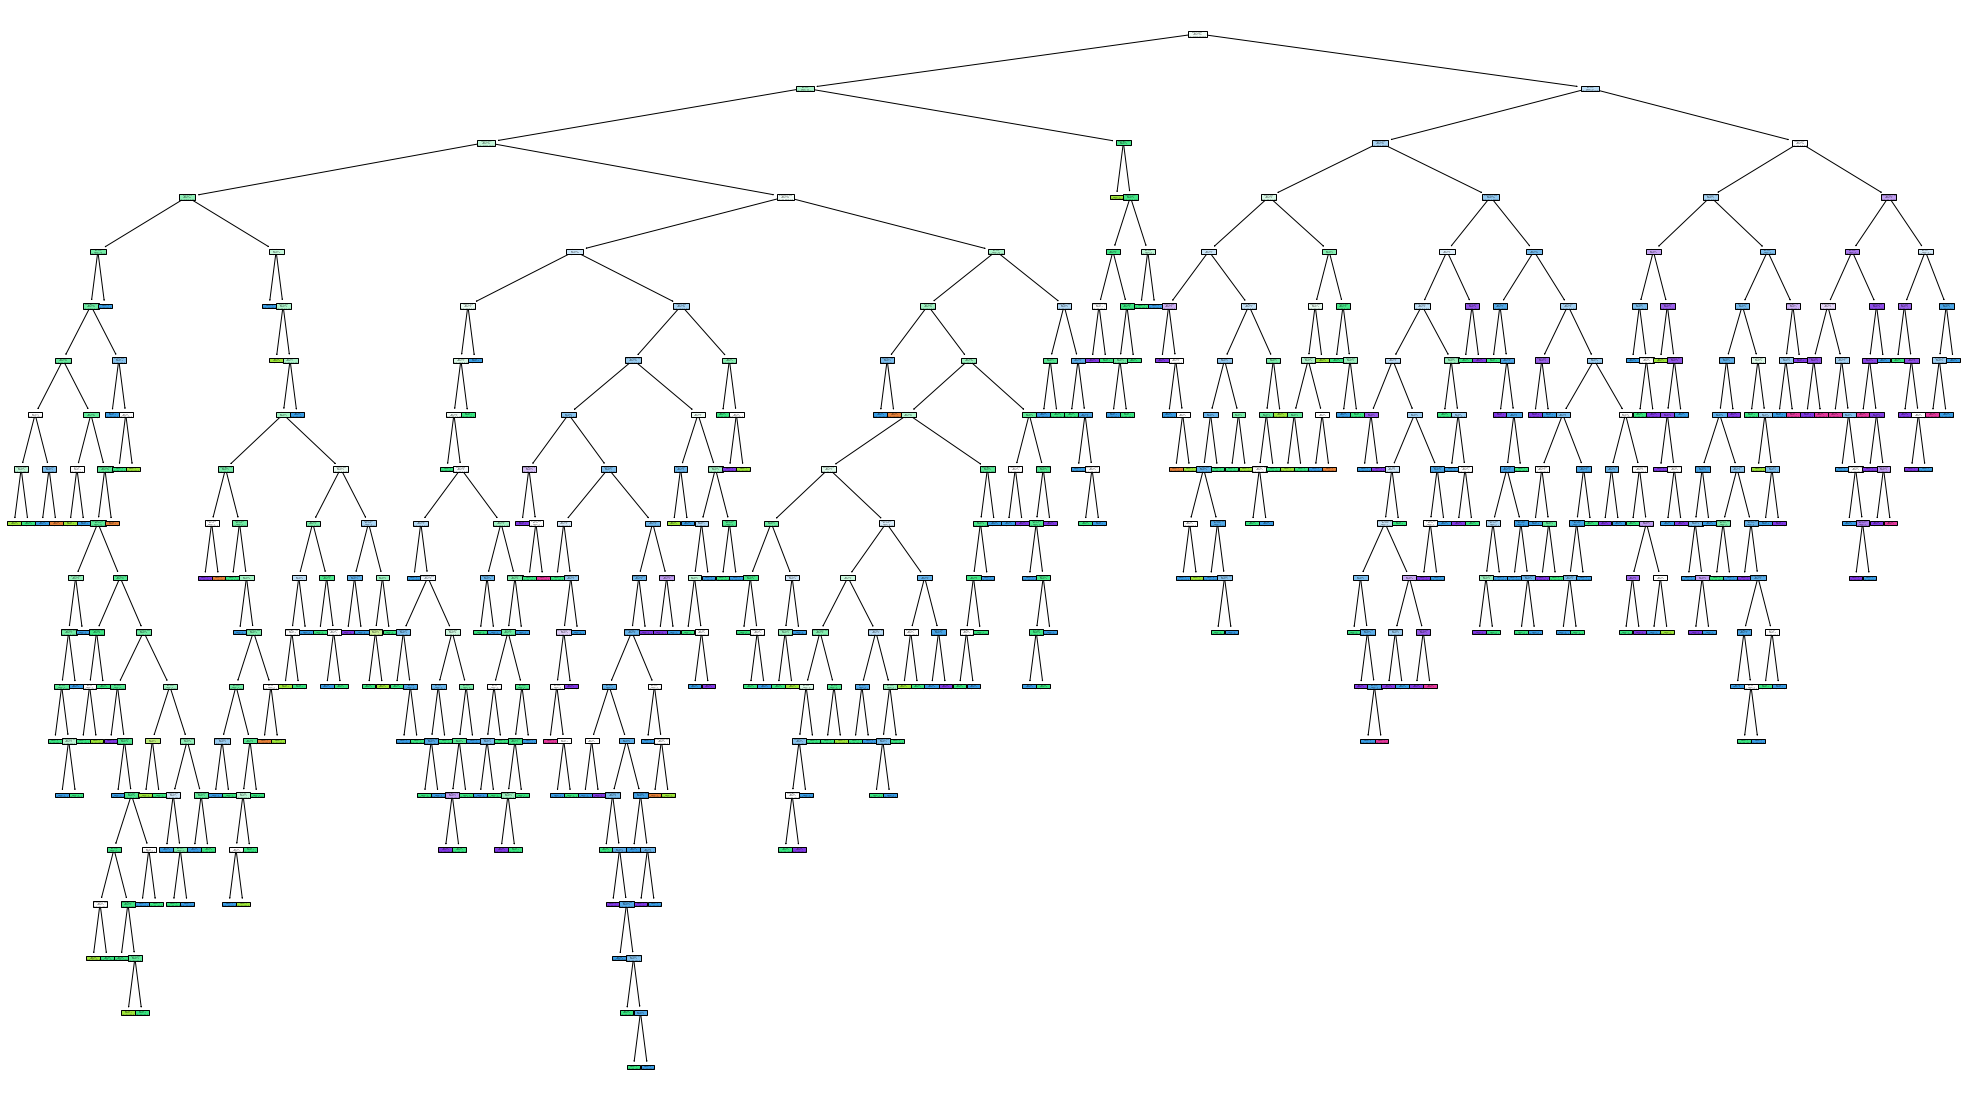

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
feature_name=list(X)
fig=plt.figure(figsize=(35,20))
_=tree.plot_tree(classifier,feature_names=feature_name,filled=True)

In [ ]:
classifier.score(X_test,y_test)

0.575

In [ ]:
classifier.score(X_train,y_train)

1.0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_tranform=scaler.fit_transform(X)

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X_tranform,y,test_size=0.3,random_state=42)

In [ ]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
classifier.score(X_train,y_train)

1.0

In [ ]:
classifier.score(X_test,y_test)

0.55625

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param={'criterion':['gini','entropy'],'max_depth':range(2,32,1),'min_samples_leaf':range(1,10,1)}
grid_search=GridSearchCV(estimator=classifier,param_grid=grid_param,cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10)})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1}

In [ ]:
classifier=DecisionTreeClassifier(criterion='gini',max_depth=11,min_samples_leaf=1)

In [ ]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11)

In [ ]:
classifier.score(X_test,y_test)

0.5541666666666667